Plik pca_d01_frame_I300_e1ce64d37ed5430d6cd872948c844f3c0aab7fab.txt istnieje.


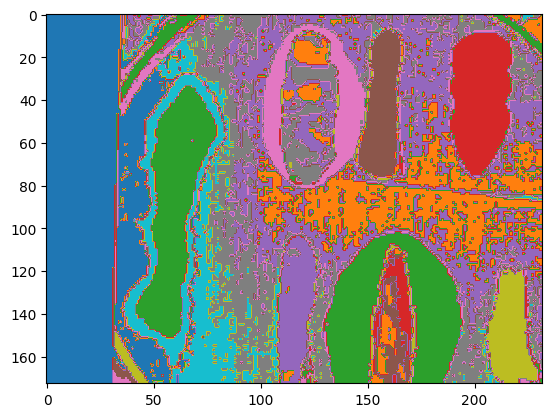

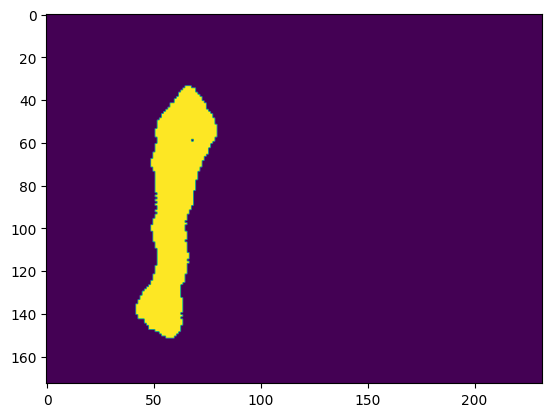

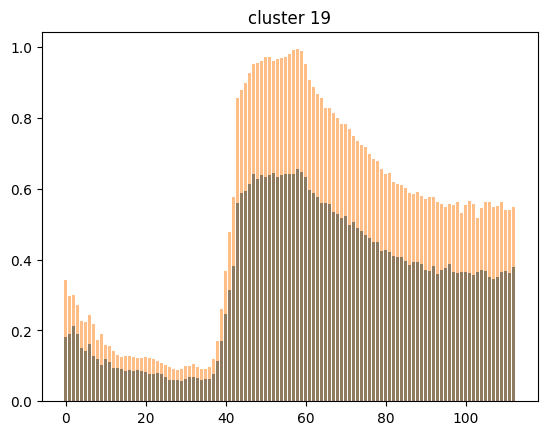

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from FileSystemCache import FileSystemCache

from matplotlib.colors import LinearSegmentedColormap


from sklearn.metrics import accuracy_score

# Kmeans on Xdr from pca
if __name__ == '__main__':
    fname = 'd01_frame_I300'
    #fname = 'd01_comparison_I350'
    record = np.load(f'{fname}.npz')
    
    data = record['data']
    X = np.reshape(data, (-1, data.shape[-1]))
    
    
    pca = PCA(n_components=20)

    Xdr = FileSystemCache(pca.fit_transform, filename=f"pca_{fname}").set_dependencies(pca.get_params()).execute(X)
    n_clusters = 20
    clustering = KMeans(n_clusters=n_clusters).fit(Xdr)

    blood_template = np.loadtxt("blood_template.txt")
    
    best_error_value = None
    best_label = -1
    for i, label in enumerate(set(clustering.labels_)):
        errors_2d = X[clustering.labels_ == label]
        error_value = np.mean([la.norm(x / np.max(x) - blood_template) for x in errors_2d])
        if (not best_error_value or best_error_value > error_value):
            best_error_value = error_value
            best_label = label

    plt.figure('All labels')
    labels2 = np.reshape(clustering.labels_, data.shape[:2])
    plt.imshow(labels2, cmap=plt.cm.tab10)

    plt.figure('Results')
    newLabels = [[1 if y == best_label else 0 for y in x] for x in labels2]
    plt.imshow(newLabels)
    plt.show()

    dis = [np.mean(la.norm(x / np.max(x) - blood_template)) for x in X]
    plt.title(f"cluster {label}")
    plt.bar(x=[x for x in range(len(blood_template))], height=X[np.argmin(dis)])
    plt.bar(x=[x for x in range(len(blood_template))], height=blood_template, alpha=0.5)
    